In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
#read the file with NFT tweets data
df_train = pd.read_csv('/Users/gefen/Desktop/NFT_Top_Collections.csv')

In [4]:
#check the columns
df_train.columns

Index(['Index', 'Name', 'Volume', 'Volume_USD', 'Market_Cap', 'Market_Cap_USD',
       'Sales', 'Floor_Price', 'Floor_Price_USD', 'Average_Price',
       'Average_Price_USD', 'Owners', 'Assets', 'Owner_Asset_Ratio',
       'Category', 'Website', 'Logo'],
      dtype='object')

In [5]:
df_train.dtypes

Index                  int64
Name                  object
Volume               float64
Volume_USD           float64
Market_Cap           float64
Market_Cap_USD       float64
Sales                  int64
Floor_Price          float64
Floor_Price_USD      float64
Average_Price        float64
Average_Price_USD    float64
Owners                 int64
Assets                 int64
Owner_Asset_Ratio    float64
Category              object
Website               object
Logo                  object
dtype: object

In [6]:
#descriptive statistics summary
goal = 'Market_Cap'
df_train[goal].describe()

count     592.000000
mean       45.134817
std       179.327166
min         0.000000
25%         0.000000
50%         0.000000
75%        21.841974
max      2530.877143
Name: Market_Cap, dtype: float64

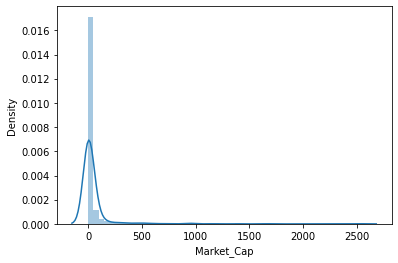

In [7]:
#histogram
sns.distplot(df_train[goal])

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train[goal].skew())
print("Kurtosis: %f" % df_train[goal].kurt())

Skewness: 8.125845
Kurtosis: 84.674119


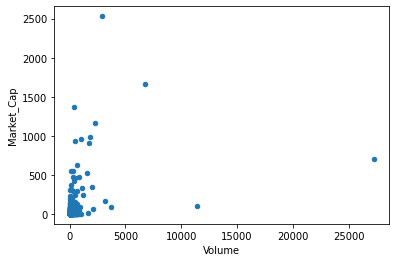

In [9]:
#scatter plot Volume/Sales
var = 'Volume'
data = pd.concat([df_train[goal], np.multiply(df_train[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal)

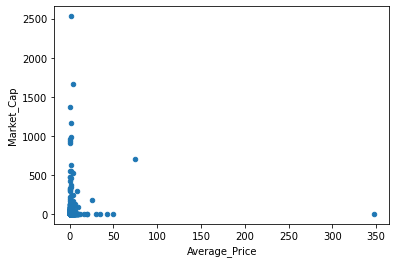

In [10]:
#scatter plot Average_Price/Sales
var = 'Average_Price'
data = pd.concat([df_train[goal], np.multiply(df_train[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal)

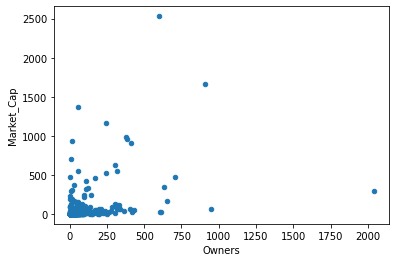

In [11]:
#scatter plot Owners/Sales
var = 'Owners'
data = pd.concat([df_train[goal], np.multiply(df_train[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal)

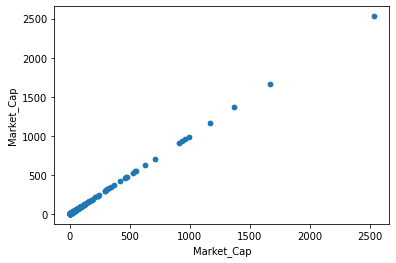

In [12]:
#scatter plot Market_Cap/Sales
var = 'Market_Cap'
data = pd.concat([df_train[goal], np.multiply(df_train[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal)

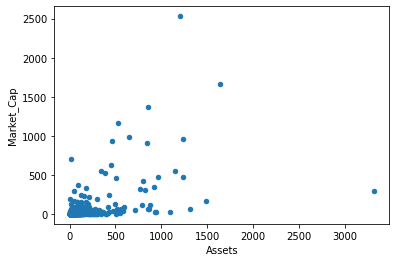

In [13]:
#scatter plot Assets/Sales
var = 'Assets'
data = pd.concat([df_train[goal], np.multiply(df_train[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal)

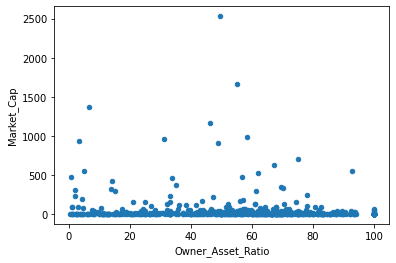

In [14]:
#scatter plot Owner_Asset_Ratio/Sales
var = 'Owner_Asset_Ratio'
data = pd.concat([df_train[goal], np.multiply(df_train[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal)

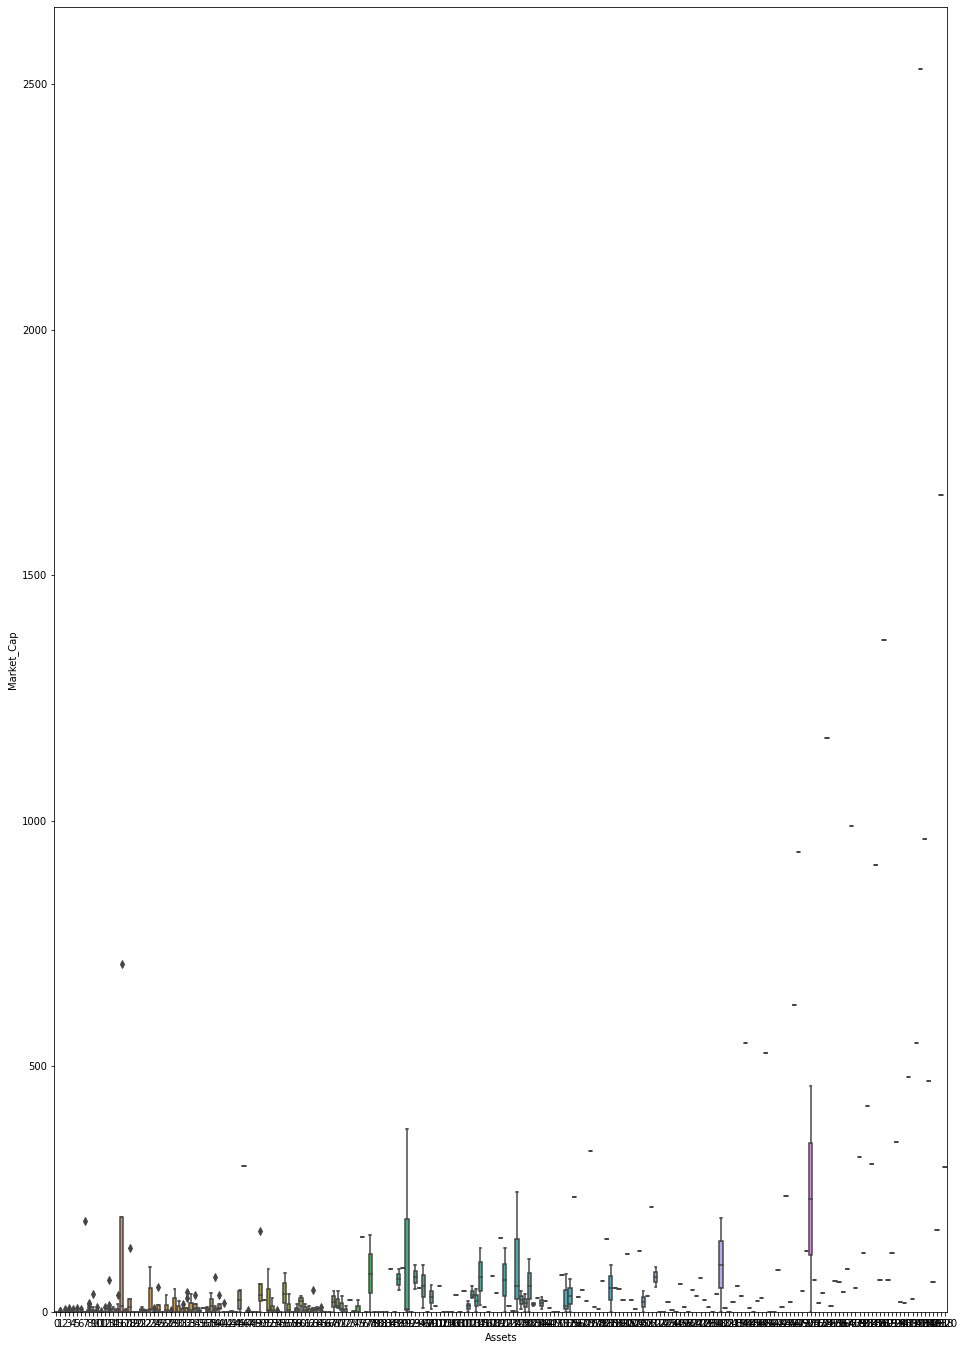

In [15]:
#box plot Assets/goal
var = 'Assets'
data = pd.concat([df_train[goal], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 24))
fig = sns.boxplot(x=var, y=goal, data=data)
fig.axis(ymin=0);


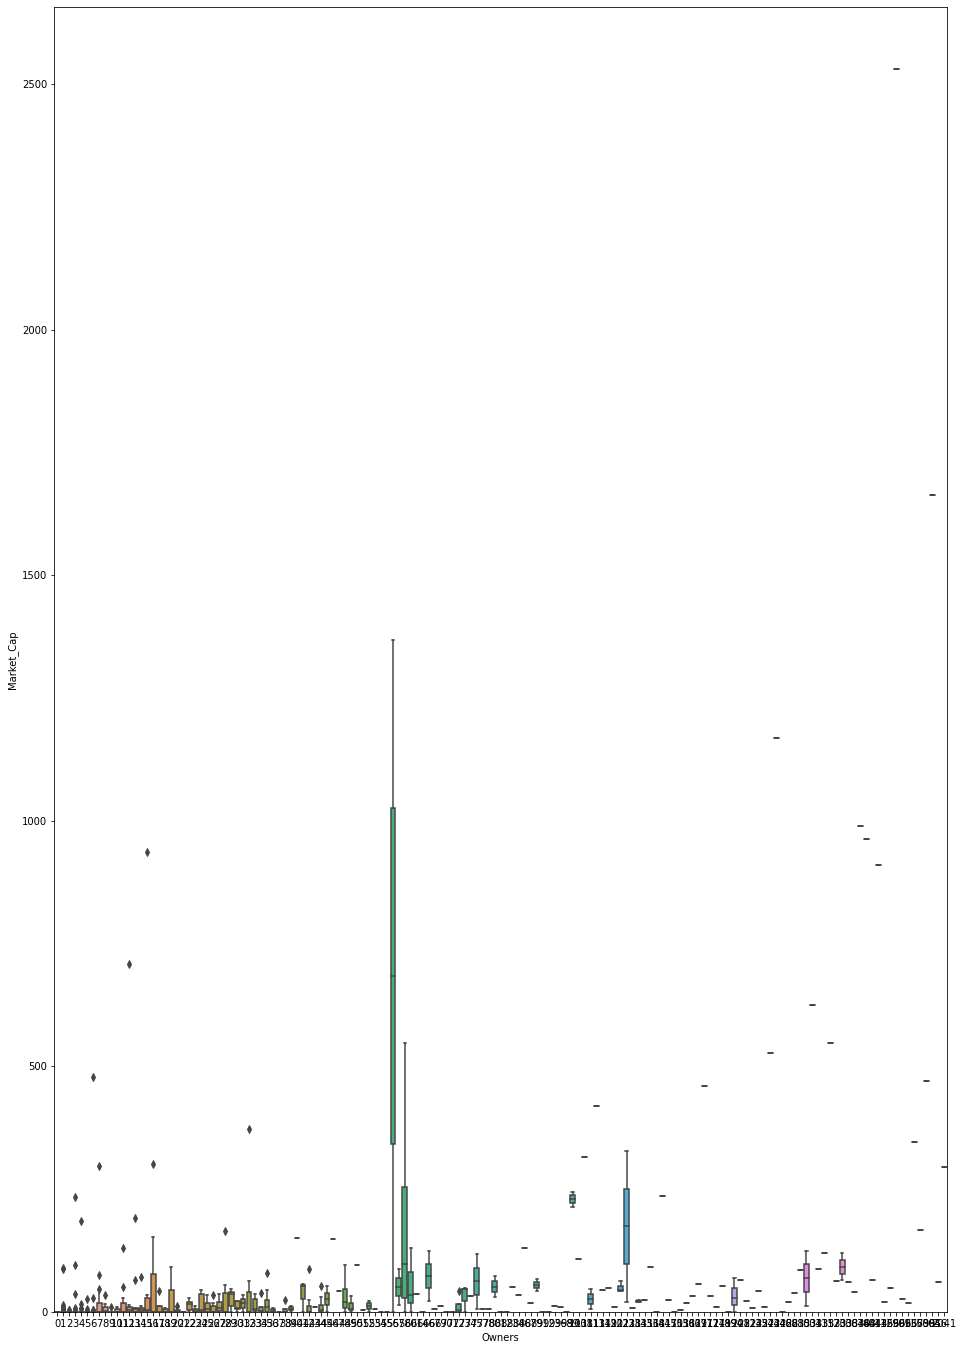

In [16]:
#box plot Owners/goal
var = 'Owners'
data = pd.concat([df_train[goal], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 24))
fig = sns.boxplot(x=var, y=goal, data=data)
fig.axis(ymin=0);

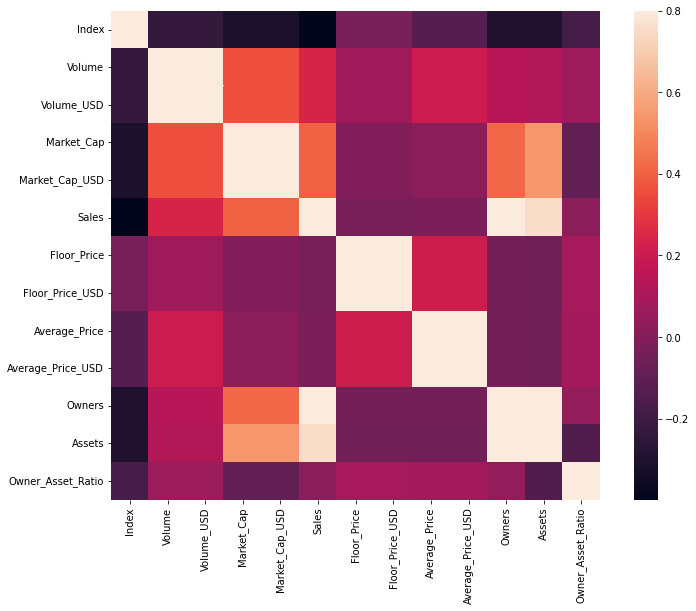

In [17]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

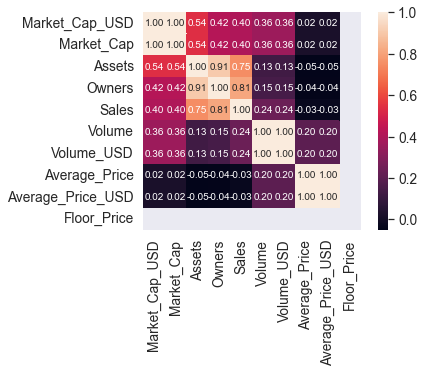

In [18]:
#Market_Cap correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, goal)[goal].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

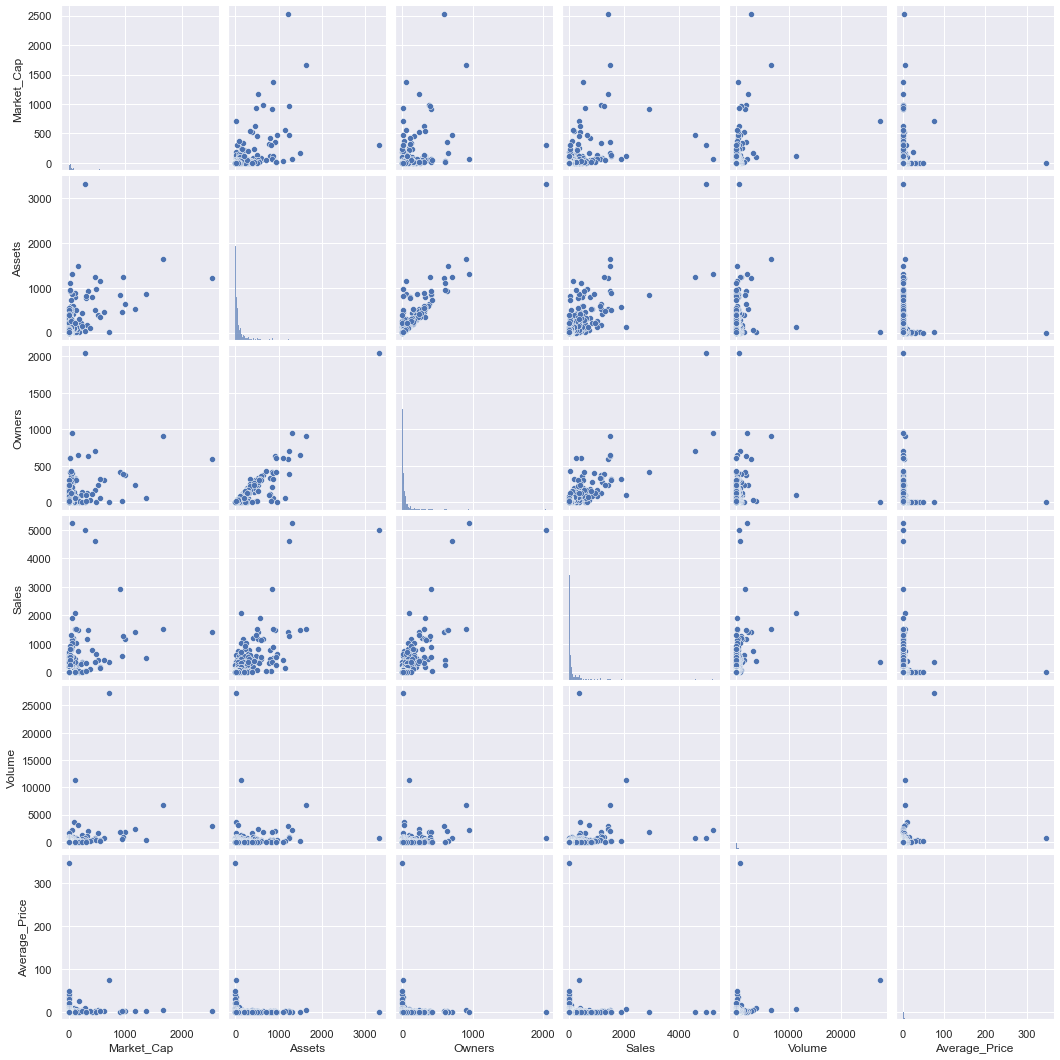

In [20]:
#scatterplot
sns.set()
cols = [goal, 'Assets', 'Owners', 'Sales', 'Volume', 'Average_Price']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [21]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Category,282,0.476351
Website,111,0.187500
Owner_Asset_Ratio,49,0.082770
Floor_Price_USD,48,0.081081
Floor_Price,48,0.081081
Logo,1,0.001689
Average_Price_USD,0,0.000000
Average_Price,0,0.000000
Owners,0,0.000000
Assets,0,0.000000


In [22]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Logo'].isnull()].index)
df_train.isnull().sum().max()

0

In [23]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train[goal][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.2521292]
 [-0.2521292]
 [-0.2521292]
 [-0.2521292]
 [-0.2521292]
 [-0.2521292]
 [-0.2521292]
 [-0.2521292]
 [-0.2521292]
 [-0.2521292]]

outer range (high) of the distribution:
[[ 3.23048642]
 [ 3.69698508]
 [ 4.82777244]
 [ 4.97319824]
 [ 5.11352984]
 [ 5.26596609]
 [ 6.26168973]
 [ 7.37761987]
 [ 9.02673536]
 [13.86181167]]
